In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from matplotlib.lines import Line2D

#### Importante, en el bivariate la última salida es reactions, una lista con el tipo de reacciones, nos permitirá sacar la estadística de ambos tiempos

In [2]:
K = 10**4
mu1 = 10**-2
mu2 = 10**-2

nEE = 1.5#0.96
nEI = 1#0.24
nIE = -1 #-0.3
nII = 0. #0./10

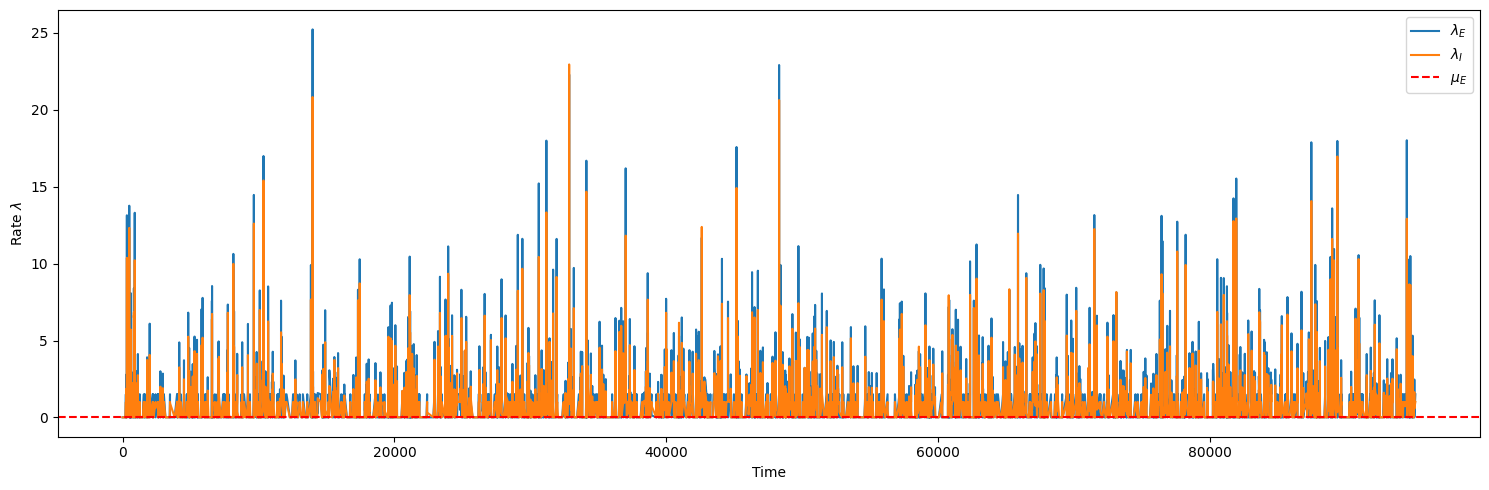

In [3]:
times_between_events, times, rate1, rate2, reactions = generate_series_bivariate(K, nEE, nII, nEI, nIE, mu1, mu2)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_E$')
plt.plot(times, rate2, label='$\lambda_I$')
plt.axhline(y=mu1, color='r', linestyle='--', label='$\mu_E$')
#plt.axhline(y=0, color='g', linestyle='--', label='$\lambda=0$')
plt.xlabel('Time')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Rate $\lambda$')
plt.legend()
plt.tight_layout()

In [ ]:
times_E = []
times_I = []
for time, reaction in zip(times, reactions):
    if reaction == 0:
        times_E.append(time)
    elif reaction == 1:
        times_I.append(time)

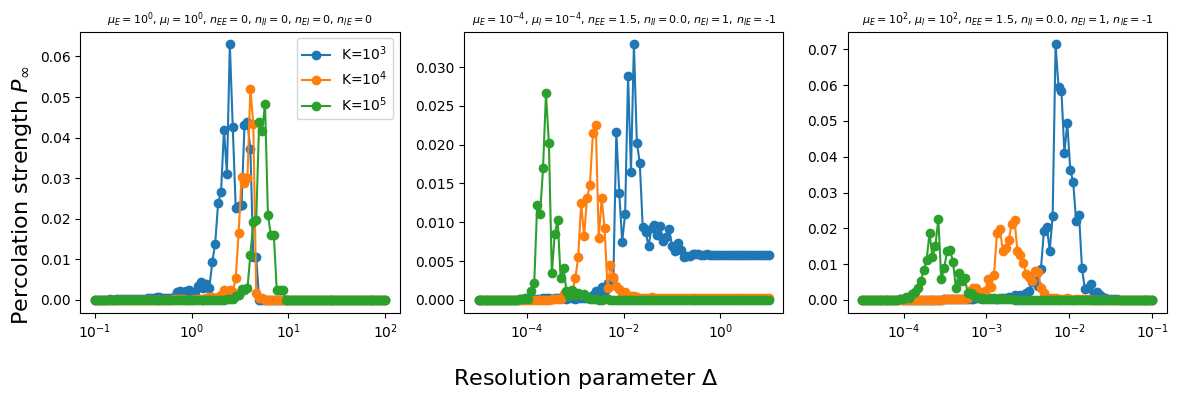

In [8]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-4.5, -1, 100)]
np.save(f'./data/deltas_bivariate_stationary', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        np.save(f'./data/percolation_mean_bivariate_stationary_plot_{i}_K={K}', percolation_mean)
        np.save(f'./data/percolation_sus_bivariate_stationary_plot_{i}_K={K}', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=10^{ int(np.log10(mus1[0]))}$, $\mu_I=10^{ int(np.log10(mus2[0]))}$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 8)
fig.axes[1].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[1]))}}$, $\mu_I=10^{ {int(np.log10(mus2[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 8)
fig.axes[2].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[2]))}}$, $\mu_I=10^{ {int(np.log10(mus2[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 8)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


# Double transition parameters

In [7]:
K = 10**4
mu1 = 10**-4
mu2 = 10**-4

nEE = 0.96
nEI = 0.24
nIE = -0.3
nII = 0./10

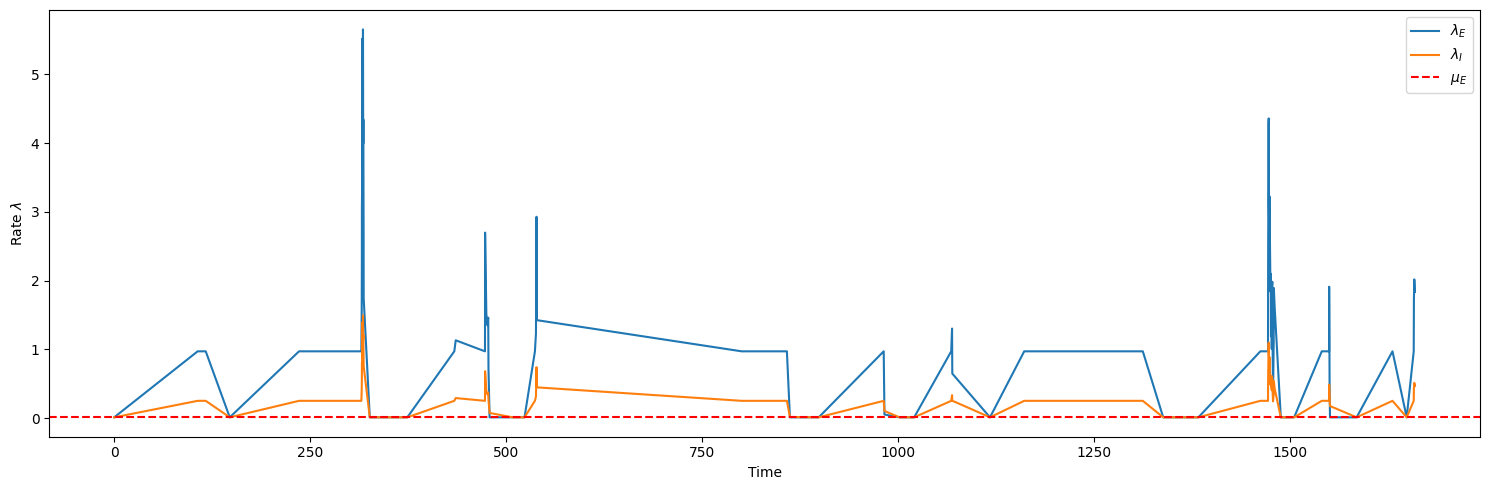

In [8]:
times_between_events, times, rate1, rate2, reactions = generate_series_bivariate(K, nEE, nII, nEI, nIE, mu1, mu2)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_E$')
plt.plot(times, rate2, label='$\lambda_I$')
plt.axhline(y=mu1, color='r', linestyle='--', label='$\mu_E$')
#plt.axhline(y=0, color='g', linestyle='--', label='$\lambda=0$')
plt.xlabel('Time')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Rate $\lambda$')
plt.legend()
plt.tight_layout()

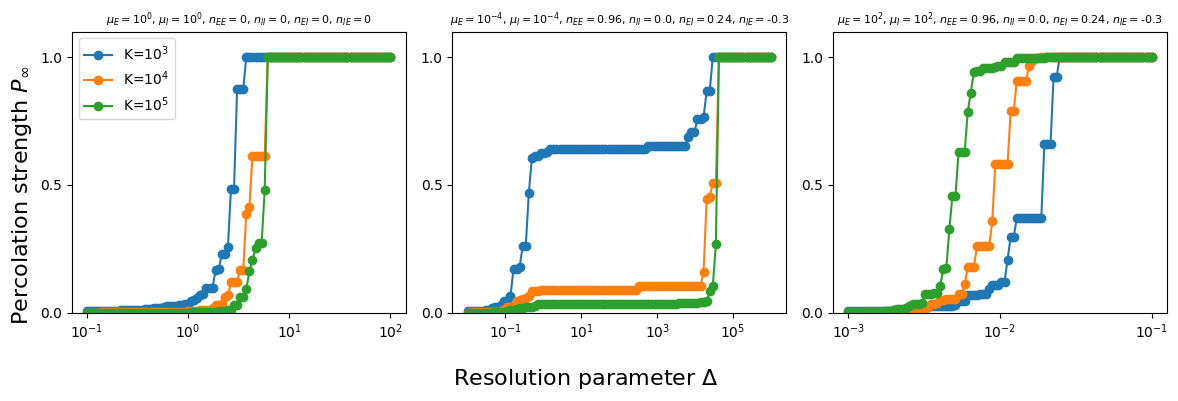

In [12]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-2, 6, 100), np.logspace(-3, -1, 100)]
np.save(f'./data/deltas_bivariate_PRL', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        np.save(f'./data/percolation_mean_bivariate_PRL_plot_{i}_K={K}', percolation_mean)
        np.save(f'./data/percolation_sus_bivariate_PRL_plot_{i}_K={K}', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=10^{ int(np.log10(mus1[0]))}$, $\mu_I=10^{ int(np.log10(mus2[0]))}$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 8)
fig.axes[1].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[1]))}}$, $\mu_I=10^{ {int(np.log10(mus2[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 8)
fig.axes[2].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[2]))}}$, $\mu_I=10^{ {int(np.log10(mus2[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 8)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


# Stats

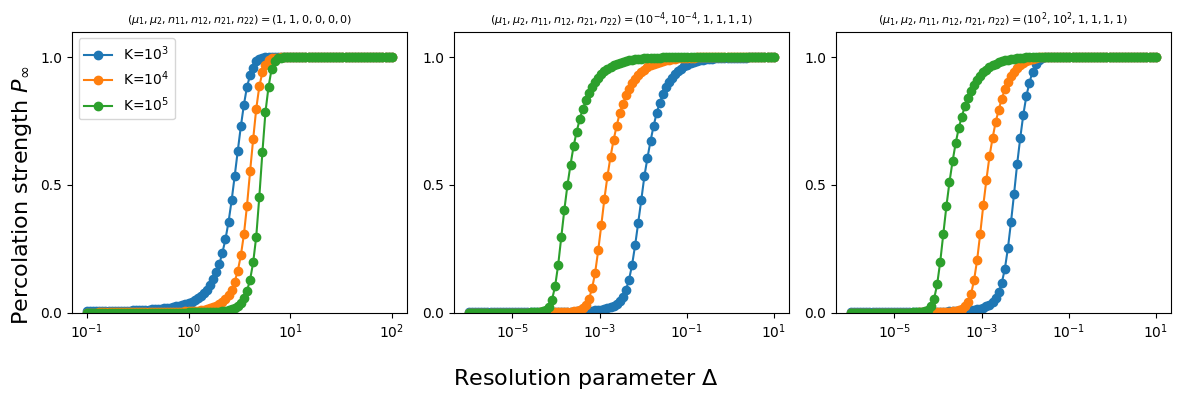

In [4]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-6, 1, 100), np.logspace(-6, 1, 100)]
np.save(f'./data/deltas_bivariate', deltas)
ns11 = [0, 1, 1]
ns22 = [0, 1, 1]
ns12 = [0, 1, 1]
ns21 = [0, 1, 1]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, reactions = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)
        percolation_strength = np.mean(percolations, axis=0)
        np.save(f'./data/percolation_means_bivariate_plot{i}_K={K}', percolation_strength)
        ax.plot(delta, percolation_strength, marker = 'o')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.axes[0].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (1, 1, 0, 0, 0, 0)$', fontsize = 8)
fig.axes[1].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (10^{-4}, 10^{-4}, 1, 1, 1, 1)$', fontsize = 8)
fig.axes[2].set_title('$(\mu_{1}, \mu_{2}, n_{11}, n_{12}, n_{21}, n_{22}) = (10^{2}, 10^{2}, 1, 1, 1, 1)$', fontsize = 8)
fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


# Stats señal "estacionaria"

In [10]:
muE = muI = 10**-2
nEE = 1.5   #0.96
nEI = 1.5     #0.24
nIE = -0.5    #-0.3
nII = 0. #0./10
K = 10**3

Delta1 = 10**-3

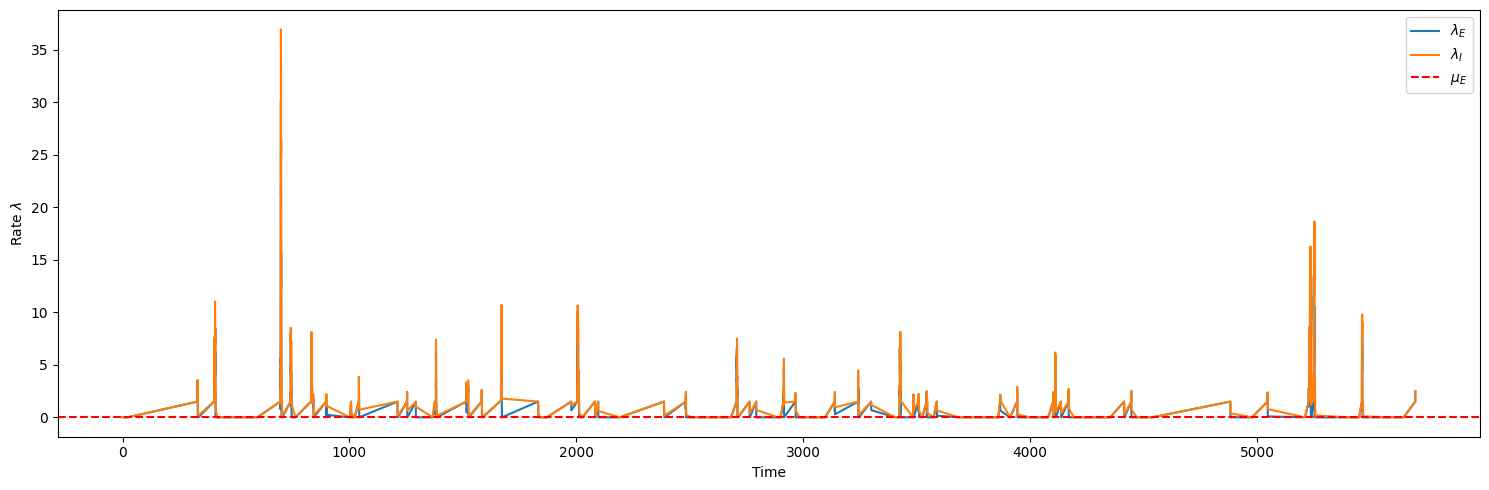

In [11]:
times_between_events, times, rate1, rate2, reactions = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_E$')
plt.plot(times, rate2, label='$\lambda_I$')
plt.axhline(y=muE, color='r', linestyle='--', label='$\mu_E$')
#plt.axhline(y=0, color='g', linestyle='--', label='$\lambda=0$')
plt.xlabel('Time')
#plt.yscale('log')
# plt.xscale('log')
# plt.xlim(100000, 200000)
plt.ylabel('Rate $\lambda$')
plt.legend()
plt.tight_layout()

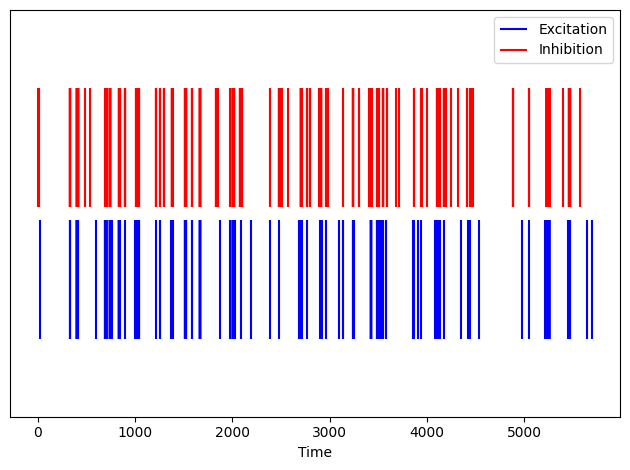

In [13]:
times_E = []
times_I = []
for time, reaction in zip(times, reactions):
    if reaction == 0:
        times_E.append(time)
    elif reaction == 1:
        times_I.append(time)

plt.eventplot([times_E, times_I], colors=['b', 'r'], linelengths=0.9, lineoffsets=[0, 1])
plt.xlabel('Time')
plt.ylabel('')
plt.yticks([])
plt.legend(['Excitation', 'Inhibition'])

plt.tight_layout()


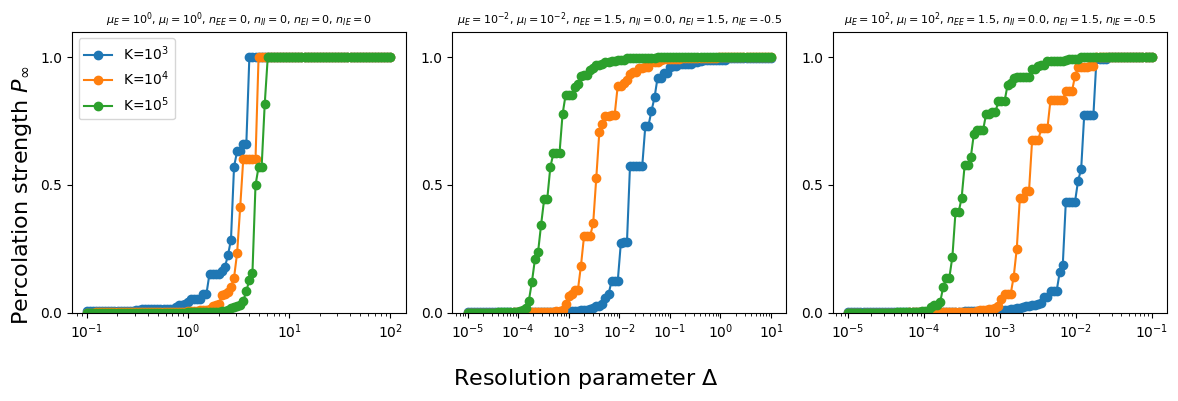

In [95]:
mus1 = [1, 10**-2, 10**2]
mus2 = [1, 10**-2, 10**2]

R = 10**0

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-5, 1, 100), np.logspace(-5, 0, 100)]
# np.save(f'./data/deltas_bivariate_stationary', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        # np.save(f'./data/percolation_mean_bivariate_stationary_plot_{i}_K={K}', percolation_mean)
        # np.save(f'./data/percolation_sus_bivariate_stationary_plot_{i}_K={K}', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=10^{ int(np.log10(mus1[0]))}$, $\mu_I=10^{ int(np.log10(mus2[0]))}$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 8)
fig.axes[1].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[1]))}}$, $\mu_I=10^{ {int(np.log10(mus2[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 8)
fig.axes[2].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[2]))}}$, $\mu_I=10^{ {int(np.log10(mus2[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 8)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
# fig.axes[0].minorticks_off()
# fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


# $\Delta = 10^0$

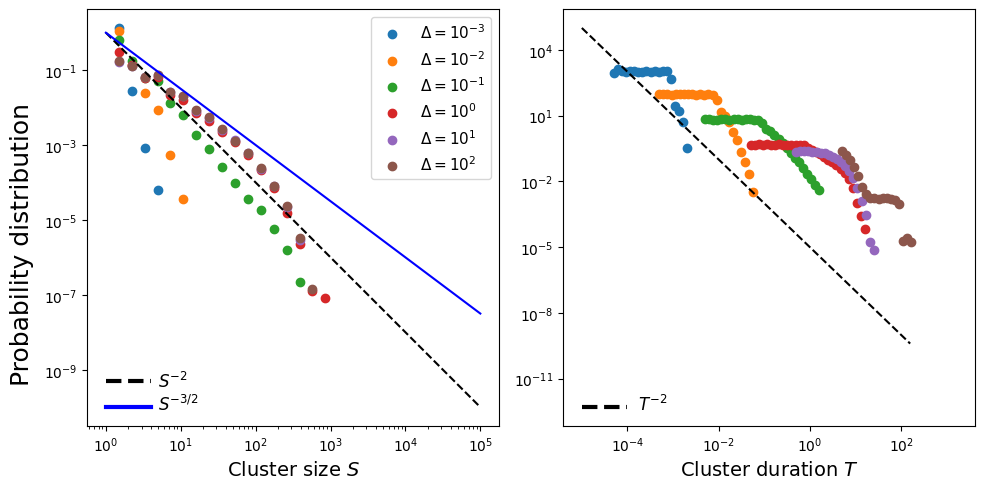

In [136]:
R = 10**3
K = 10**5
deltas = np.logspace(-3, 1, num = 5) 
s_bins = np.logspace(0, 5, num = 30, base = 10)
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

for delta in deltas:
    t_bins = np.logspace(np.log10(0.05*delta), np.log10(20*delta), num = 30, base = 10)
    all_cluster_sizes = []
    all_cluster_times = []
    for _ in range(R):
        _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, 10**-4, 10**-4)
        _, cluster_sizes, cluster_times = identify_clusters(times, delta)
        all_cluster_sizes.extend(cluster_sizes)
        all_cluster_times.extend(cluster_times)
    # np.save(f'./data/Sizes bivariate stationary Delta = {delta}', all_cluster_sizes)
    # np.save(f'./data/Times bivariate stationary Delta = {delta}', all_cluster_times)
    s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
    ax0.scatter(s_bins[:-1], s_hist[0], label = f'$\Delta = 10^{ {int(np.log10(delta))}}$')
    t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
    ax1.scatter(t_bins[:-1], t_hist[0], label = f'$\Delta = 10^{ {int(np.log10(delta))}}$')

ax0.legend(fontsize = 11)
# ax1.legend(fontsize = 11)

y_s = s_bins**(-2)
t_aux = np.logspace(-5, 2.2, num = 50)
y_t = t_aux**(-2)*10**-5
y_s2 = s_bins**(-3/2)

ax0.plot(s_bins, y_s, linestyle= '--', color = 'black', label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$', color = 'blue')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$', fontsize=14)

fig.supylabel('Probability distribution', fontsize=18)

ax1.plot(t_aux, y_t, label='$T^{-2}$', color = 'black', linestyle= '--')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$', fontsize=14)

fig.axes[0].annotate('$S^{-2}$', xy=(3.2, 1.5E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*5E-10, color='black', linestyle='--', lw = 3)

fig.axes[0].annotate('$S^{-3/2}$', xy=(3.2, 0.35E-10), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[0].plot(np.logspace(0.0, 0.6, 10), np.ones(10)*1E-10, color='blue', linestyle='-', lw = 3)

fig.axes[1].annotate('$T^{-2}$', xy=(0.000085, 0.85E-13), xycoords='data', xytext=(10, 10), textcoords='offset points', fontsize=12)
fig.axes[1].plot(np.logspace(-5, -4, 10), np.ones(10)*5E-13, color='black', linestyle='--', lw = 3)

fig.tight_layout()

# $\Delta = 10^1$

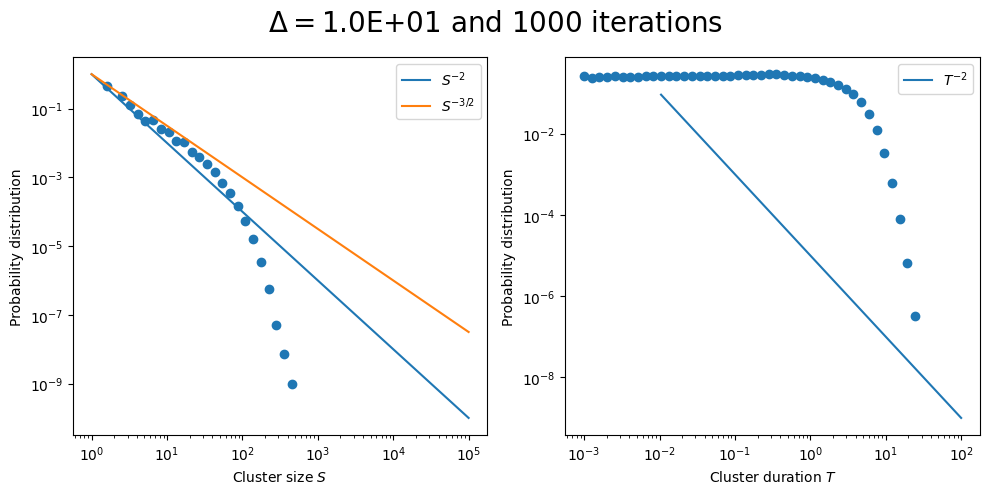

In [10]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = Delta1*1000*10

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate estacionario Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate estacionario Delta = {delta}', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-3, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# $\Delta = 10^2$

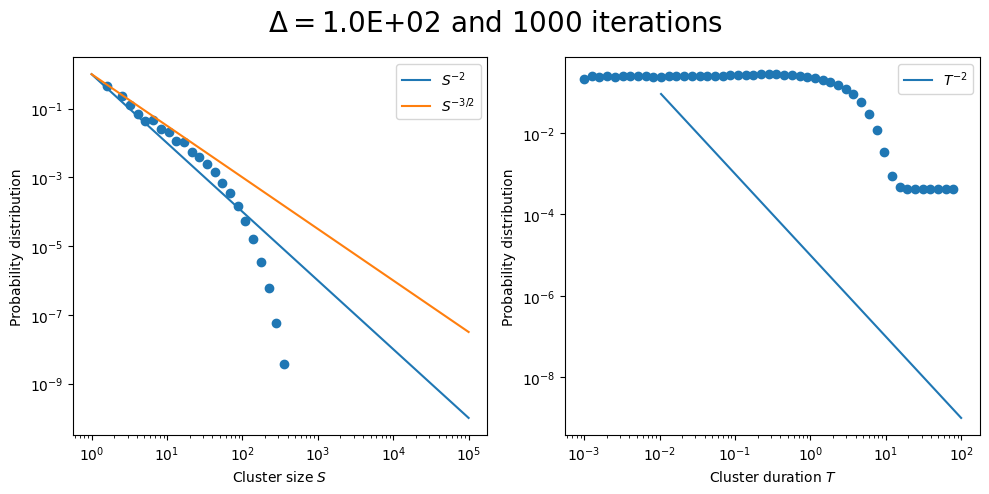

In [11]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = Delta1*1000*100

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate estacionario Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate estacionario Delta = {delta}', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-3, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# $\Delta=  10^3$

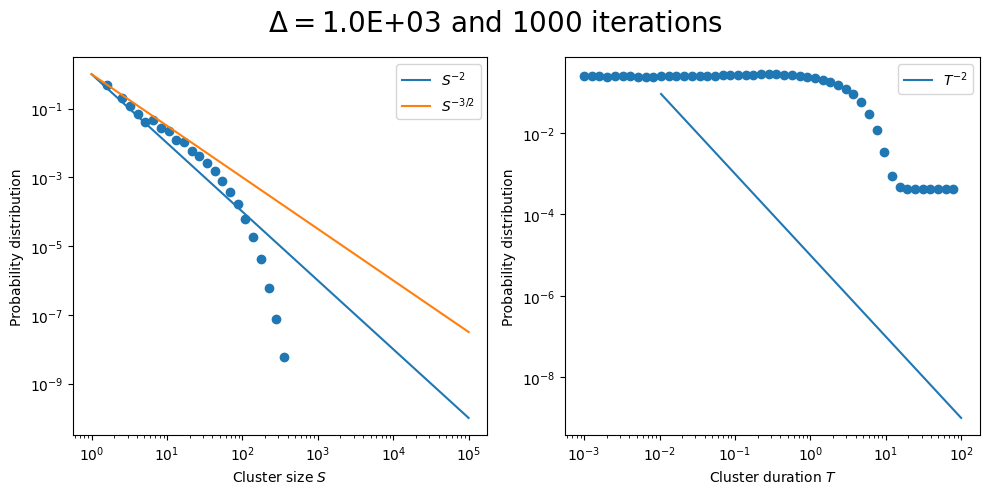

In [12]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = Delta1*1000*1000

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate estacionario Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate estacionario Delta = {delta}', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-3, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# $\Delta = 10^5$

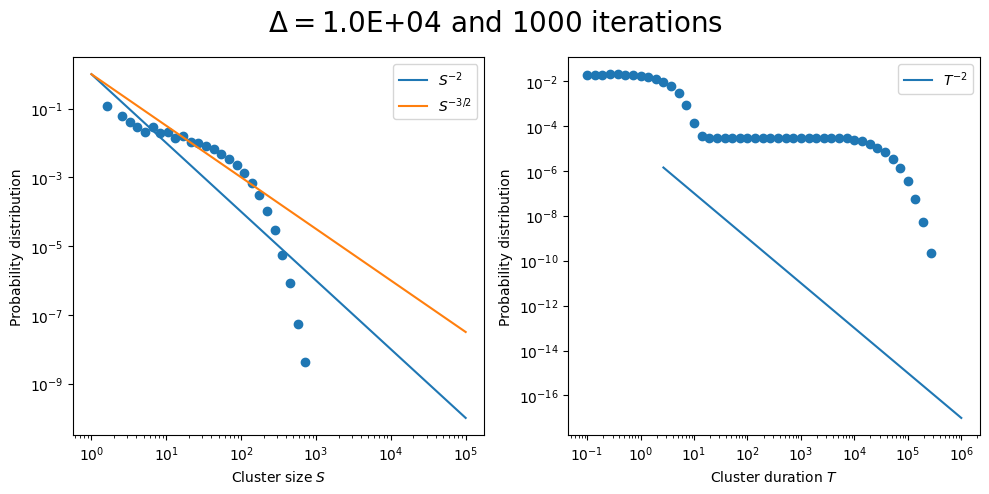

In [13]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = Delta1*1000*10000

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate estacionario Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate estacionario Delta = {delta}', all_cluster_times)



s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-1, 6, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# Stats señal PRL

In [14]:
muE = muI = 10**-4
nEE = 0.96
nEI = 0.24
nIE = -0.3
nII = 0./10
K = 10**5

Delta1 = 10**-2

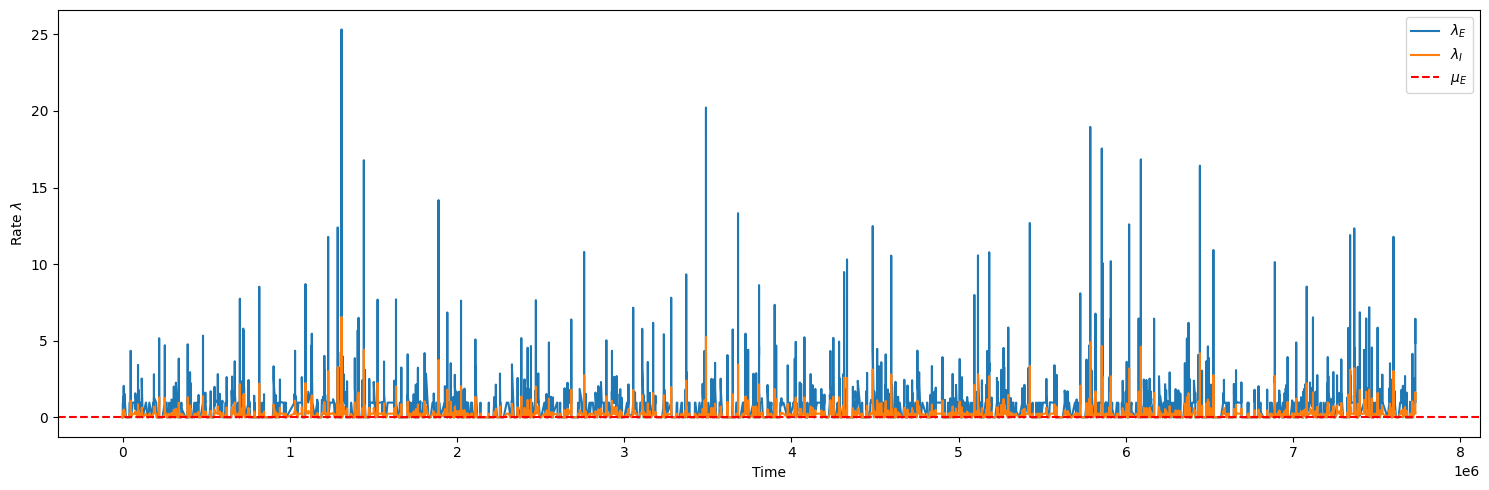

In [ ]:
times_between_events, times, rate1, rate2, reactions = generate_series_bivariate(K, nEE, nII, nEI, nIE, mu1, mu2)
plt.figure(figsize=(15,5))
plt.plot(times, rate1, label='$\lambda_E$')
plt.plot(times, rate2, label='$\lambda_I$')
plt.axhline(y=mu1, color='r', linestyle='--', label='$\mu_E$')
#plt.axhline(y=0, color='g', linestyle='--', label='$\lambda=0$')
plt.xlabel('Time')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Rate $\lambda$')
plt.legend()
plt.tight_layout()

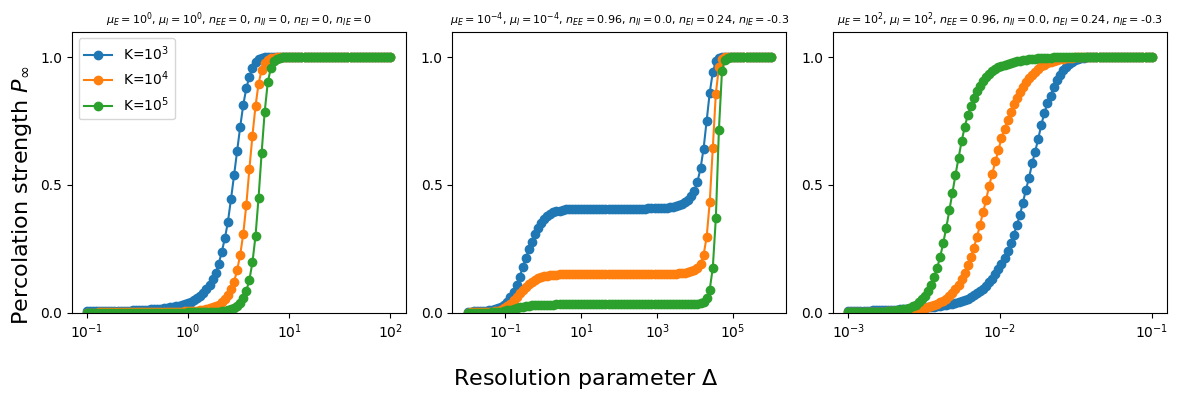

In [ ]:
mus1 = [1, 10**-4, 10**2]
mus2 = [1, 10**-4, 10**2]

R = 10**3

labels = ['K=$10^{3}$', 'K=$10^{4}$', 'K=$10^{5}$']
deltas = [np.logspace(-1, 2, 100), np.logspace(-2, 6, 100), np.logspace(-3, -1, 100)]
np.save(f'./data/deltas_bivariate_PRL', deltas)
ns11 = [0, nEE, nEE]
ns22 = [0, nII, nII]
ns12 = [0, nEI, nEI]
ns21 = [0, nIE, nIE]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

for i in range(len(mus1)):
    n11 = ns11[i]
    n12 = ns12[i]
    n21 = ns21[i]
    n22 = ns22[i]
    mu1 = mus1[i]
    mu2 = mus2[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        for j in range(R):
            times_between_events, _, _, _, _ = generate_series_bivariate(K, n11, n12, n21, n22, mu1, mu2)
            percolations[j, :] = calculate_percolation_strength(times_between_events, delta)

        percolation_mean = np.mean(percolations, axis=0)
        percolation_sus = np.std(percolations, axis=0)**2/percolation_mean #susceptibility
        
        np.save(f'./data/percolation_mean_bivariate_PRL_plot_{i}_K={K}', percolation_mean)
        np.save(f'./data/percolation_sus_bivariate_PRL_plot_{i}_K={K}', percolation_sus)

        ax.plot(delta, percolation_mean, marker = 'o')
        #ax.plot(delta, percolation_sus, marker = 'o')

    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])


fig.axes[0].set_title(f'$\mu_E=10^{ int(np.log10(mus1[0]))}$, $\mu_I=10^{ int(np.log10(mus2[0]))}$, $n_{{EE}}=${ns11[0]}, $n_{{II}}=${ns22[0]}, $n_{{EI}}=${ns12[0]}, $n_{{IE}}=${ns21[0]}', fontsize = 8)
fig.axes[1].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[1]))}}$, $\mu_I=10^{ {int(np.log10(mus2[1]))}}$, $n_{{EE}}=${ns11[1]}, $n_{{II}}=${ns22[1]}, $n_{{EI}}=${ns12[1]}, $n_{{IE}}=${ns21[1]}', fontsize = 8)
fig.axes[2].set_title(f'$\mu_E=10^{ {int(np.log10(mus1[2]))}}$, $\mu_I=10^{ {int(np.log10(mus2[2]))}}$, $n_{{EE}}=${ns11[2]}, $n_{{II}}=${ns22[2]}, $n_{{EI}}=${ns12[2]}, $n_{{IE}}=${ns21[2]}', fontsize = 8)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='best', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()


# $\Delta = 10^{-2}$

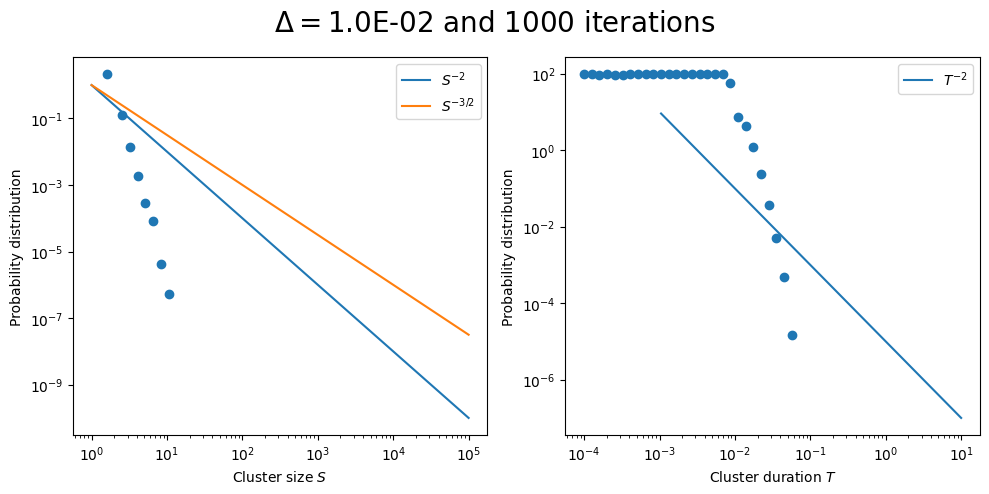

In [15]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = 10**-2

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate PRL Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate PRL Delta = {delta}', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-4, 1, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# $\Delta = 10^{-1}$

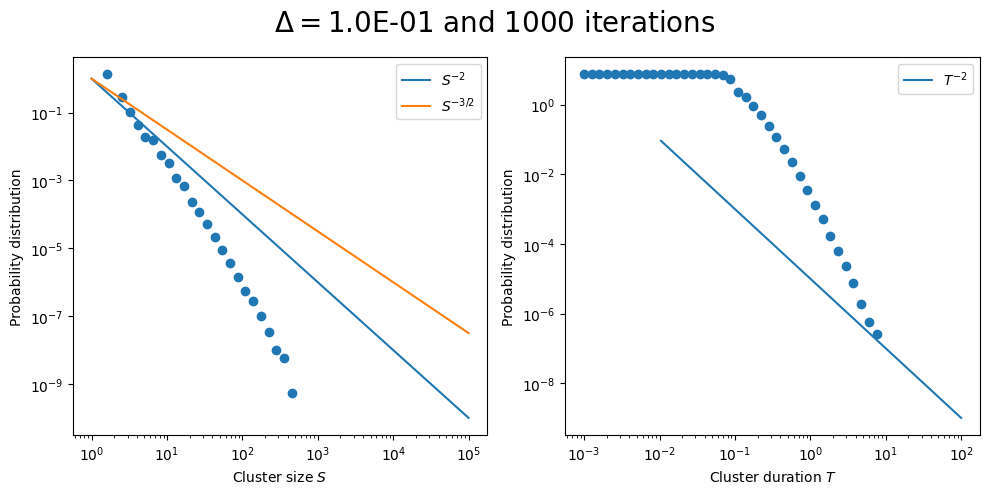

In [16]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = 10**-1

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate PRL Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate PRL Delta = {delta}', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-3, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# $\Delta = 10^1$

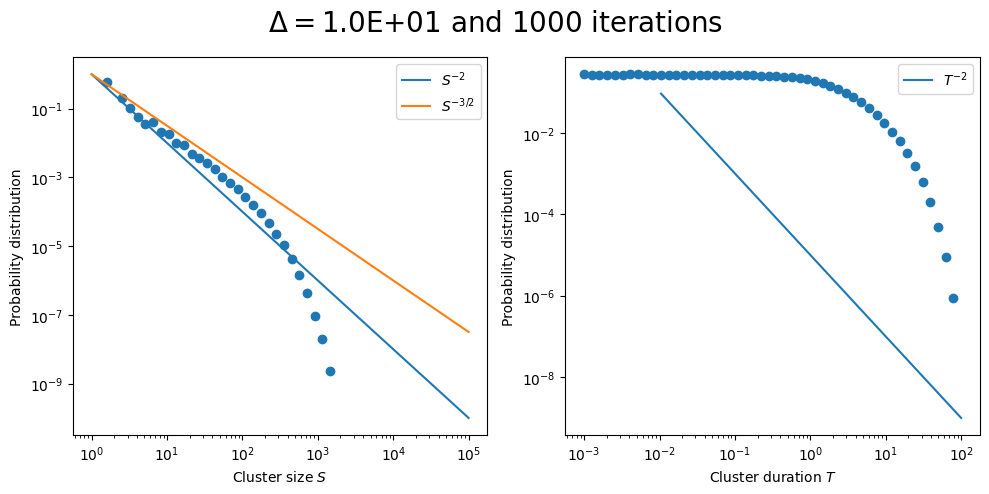

In [17]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = 10**1

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate PRL Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate PRL Delta = {delta}', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-3, 2, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# $\Delta=  10^2$

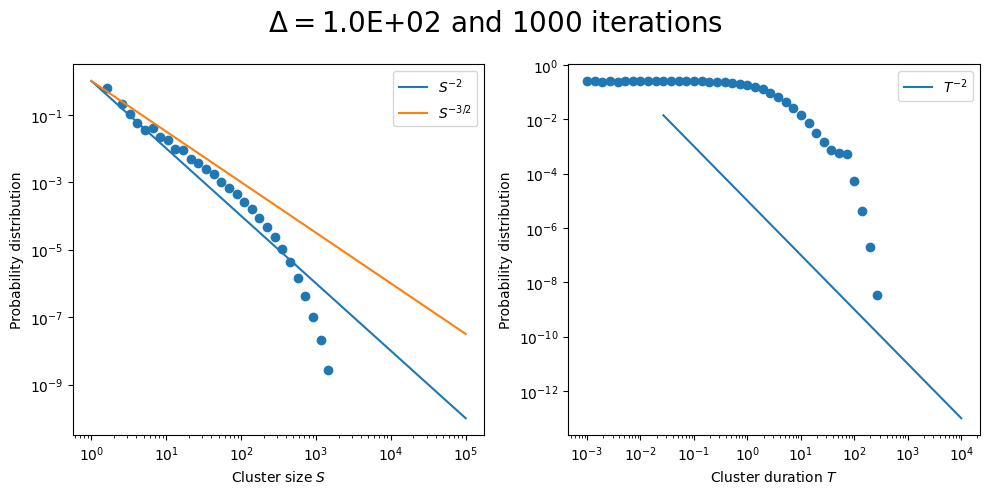

In [18]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = 10**2

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate PRL Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate PRL Delta = {delta}', all_cluster_times)

s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-3, 4, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()

# $\Delta = 10^4$

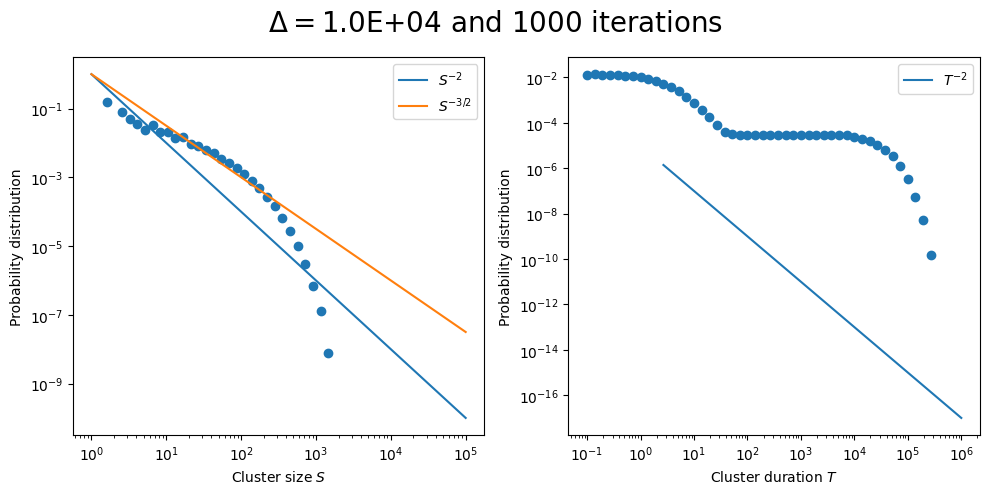

In [19]:
R = 10**3
all_cluster_sizes = []
all_cluster_times = []

delta = 10**4

for _ in range(R):
    _, times, _, _, _ = generate_series_bivariate(K, nEE, nII, nEI, nIE, muE, muI)
    _, cluster_sizes, cluster_times = identify_clusters(times, delta)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_times.extend(cluster_times)
np.save(f'./data/Sizes bivariate PRL Delta = {delta}', all_cluster_sizes)
np.save(f'./data/Times bivariate PRL Delta = {delta}', all_cluster_times)



s_bins = np.logspace(0, 5, num = 50, base = 10)
t_bins = np.logspace(-1, 6, num = 50, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

s_hist = np.histogram(all_cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(all_cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E} and ${R}$ iterations', fontsize=20)

fig.tight_layout()